In [2]:
import tweepy
import pandas as pd
import networkx as nx
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib

In [6]:
CONSUMER_KEY = "FWDYm0zJc8qvEXOLAvMjyJIQ5"
CONSUMER_SECRET = "iLzLWLlA6nVW4aE8FD68aDpITZ2XeaUb9yS6zsA7AEPma9of3q"
ACCESS_TOKEN_KEY = "1313832251830923266-XOrPHrark9MMPN7TuDQiQpVPraAdMe"
ACCESS_TOKEN_SECRET = "hf5zc16eYnwXt7a8PNerGlxtyWnk2MOfDLRXs5zsOz1oe"

In [7]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN_KEY, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
me = api.get_user(screen_name = "ShopeeSG")
me.id

3038995075

In [7]:
user_list = [me.id]
follower_list = []
for user in user_list:
    followers = []
    try:
        for page in tweepy.Cursor(api.get_follower_ids, user_id=user).pages():
            follower_list.extend(page)
        follower_list.append(followers)
    except tweepy.TweepyException:
        print("error")
        continue


In [9]:
df = pd.DataFrame(columns = ['source', 'target', 'follower_count'])
df['target'] = follower_list
df['source'] = me.id
for i in range(len(df)):
    temp = api.get_user(user_id = df['target'][i])
    df['follower_count'][i] = temp.followers_count
    df.to_csv('shopee_twitter1.csv', index = False)
df

C:\Users\Andy\AppData\Local\Temp\ipykernel_11864\1982251803.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['follower_count'][i] = temp.followers_count
Rate limit reached. Sleeping for: 613
Rate limit reached. Sleeping for: 626
Rate limit reached. Sleeping for: 614


In [12]:
df = pd.read_csv('shopee_twitter1.csv')
df

,source,target,follower_count
0,3038995075,1589996085895782401,2
1,3038995075,1589986165905494016,2
2,3038995075,1589984293542952960,0
3,3038995075,1490472790868340747,334
4,3038995075,1578447002056396800,27
...,...,...,...
2629,3038995075,1329575609505353730,30
2630,3038995075,1119152485434707971,38
2631,3038995075,1508080573172301825,7
2632,3038995075,1334239013658484736,24


In [13]:
# Set node sizes
df = df.sort_values(by=['follower_count'], ascending=False)
df = df[:26].reset_index()
size = [(df['follower_count'][i])/10 for i in range(len(df))]
size
for i in range(len(df)):
    df['source'][i] = 'ShopeeSG'
    df['target'][i] = api.get_user(user_id = df['target'][i]).screen_name
    # size.append(4000 if df['follower_count'][i] > 1000000 else 1000)
df

C:\Users\Andy\AppData\Local\Temp\ipykernel_23412\3371604712.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'][i] = api.get_user(user_id = df['target'][i]).screen_name


,index,source,target,follower_count
0,1901,ShopeeSG,the_rosebay,61818
1,168,ShopeeSG,SilverQueenID,29043
2,1314,ShopeeSG,STAYCNews,26461
3,35,ShopeeSG,cmiladrewb,16573
4,1541,ShopeeSG,mintboxian,13568
5,2187,ShopeeSG,jihoonjuseyo,10852
6,2463,ShopeeSG,mydarlingcheol,9965
7,205,ShopeeSG,KiitoCleaning,7393
8,1139,ShopeeSG,xinzaixinjiapo,6486
9,20,ShopeeSG,bianca_morgan2,5712


In [14]:
df

,index,source,target,follower_count
0,1901,ShopeeSG,the_rosebay,61818
1,168,ShopeeSG,SilverQueenID,29043
2,1314,ShopeeSG,STAYCNews,26461
3,35,ShopeeSG,cmiladrewb,16573
4,1541,ShopeeSG,mintboxian,13568
5,2187,ShopeeSG,jihoonjuseyo,10852
6,2463,ShopeeSG,mydarlingcheol,9965
7,205,ShopeeSG,KiitoCleaning,7393
8,1139,ShopeeSG,xinzaixinjiapo,6486
9,20,ShopeeSG,bianca_morgan2,5712


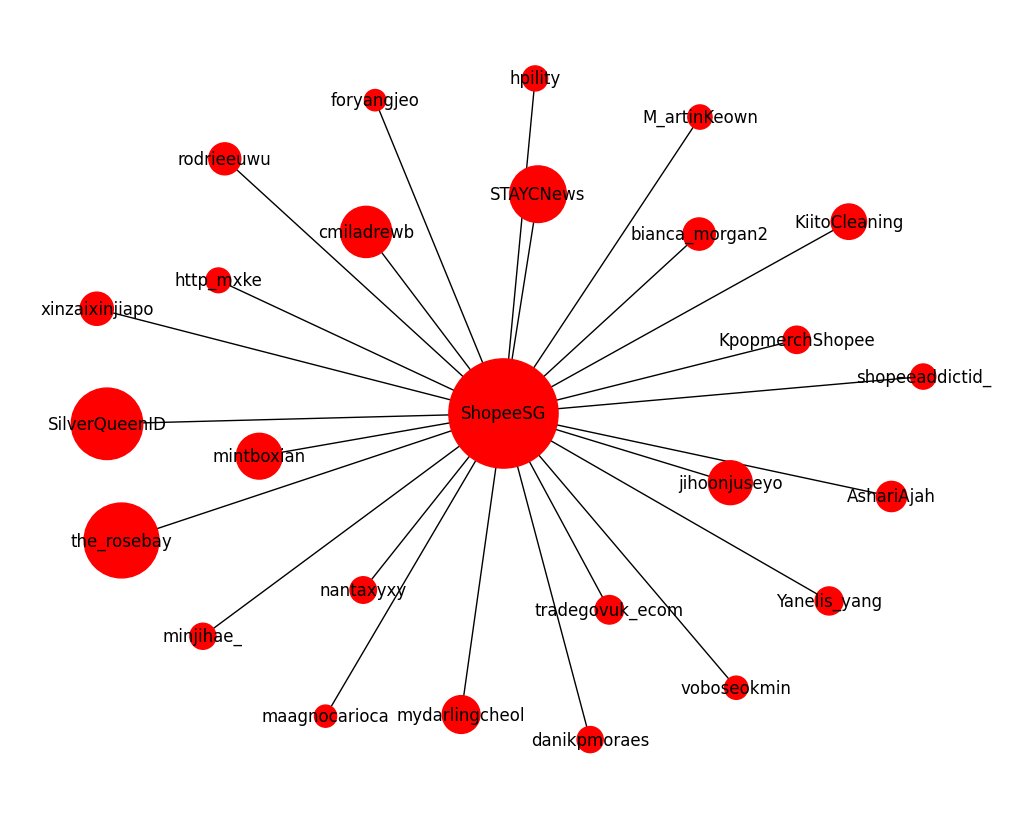

In [15]:
G = nx.from_pandas_edgelist(df[:-1], source='source', target='target')
figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='red', node_size=size)
plt.savefig("twitter_followers.png")
plt.show()
